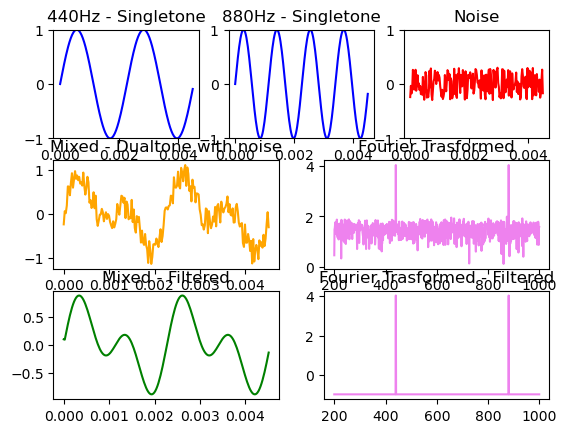

In [39]:
import numpy as np
from scipy import fft
from matplotlib import pyplot as plt
t_range = 200                                  # range of time to plot
freq_start = 200
freq_stop = 1000

plt.subplot(331)
plt.title("440Hz - Singletone")
plt.ylim(-1, 1)
plt.plot(t[:t_range], signal1[:t_range], color = 'blue')

plt.subplot(332)
plt.title("880Hz - Singletone")
plt.ylim(-1, 1)
plt.plot(t[:t_range], signal2[:t_range], color = 'blue')

plt.subplot(333)
plt.title("Noise")
plt.ylim(-1, 1)
plt.plot(t[:t_range], noise[:t_range], color = 'red')

plt.subplot(323)
plt.title("Mixed - Dualtone with noise")
plt.plot(t[:t_range], mixed[:t_range], color = 'orange')

plt.subplot(324)
plt.title("Fourier Trasformed")
plt.plot(freq[freq_start:freq_stop], np.log10(np.abs(fourier[freq_start:freq_stop])), color='violet')

plt.subplot(325)
plt.title("Mixed - Filtered")
plt.plot(t[:t_range], mixed_filtered[:t_range], color = 'green')

plt.subplot(326)
plt.title("Fourier Trasformed - Filtered")
plt.plot(freq[freq_start:freq_stop], np.log10(np.abs(fourier_filtered[freq_start:freq_stop])), color='violet')


play = np.append(signal1,signal2,axis=0)       # concatenating signals to play.
play = np.append(play,noise,axis=0)            # concatenating noise to play.
play = np.append(play,mixed,axis=0)            # concatenating result to play.
play = np.append(play,mixed_filtered,axis=0) 

sd.play(play,rate)                             # play through sounddevice

plt.show()

In [11]:
import numpy as np
import sounddevice as sd

rate = 44100.0                                 # SampleRate, 44100 Sampling per 1 sec, 44100Hz         
sec = 1                                        # Signal Duration: 1 sec
t = np.arange(0, sec, 1/rate)                  # Time array contains range of [0:1]
                                               # unit time: 1/rate

# Signal 생성하기
sin_freq = 440                                 # Frequency for sine func
signal1 = np.sin(2*np.pi*sin_freq*t )          # get sine value from radian converted from timestamp

sd.play(signal1,rate)

In [14]:
signal1 = np.sin(2*np.pi*sin_freq*t )          # get sine value from radian converted from timestamp
signal2 = np.sin(2*np.pi*sin_freq*2*t )        # 1 Octave higher signal (Double times freq)

noise = np.random.uniform(-0.3, 0.3, len(t))   # Uniform Distribution Random
                                               # In range of -0.3~0.3 (30% volume of signal)
mixed = 0.5*(signal1 + signal2) + noise        # Mixing signals with noise

sd.play(mixed,rate)

In [16]:
freq = np.fft.fftfreq(len(t), 1/rate)          # fftfreq returns axis array for Fourier Transformed
fourier = np.fft.fft(mixed)                    # get fourier transformed value

In [17]:

fourier_filtered = np.array(fourier)           # new ndarray for filtered fourier transformed
for i in range(len(fourier)):                  # iterate in range of all freq
    if(np.abs(fourier[i])<1000):               # if signal in specific freq is too weak,
        fourier_filtered[i]=complex(1e-1,0)    # disregard. (give enough small complex value)

mixed_filtered = np.fft.ifft(fourier_filtered).real # get filtered wave (take only real part)
sd.play(mixed_filtered,rate)